Path to dataset files: /root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3
⚠️ GPU is Unavailable!
Number of Classes: 2
Classes: ['nofire', 'fire']


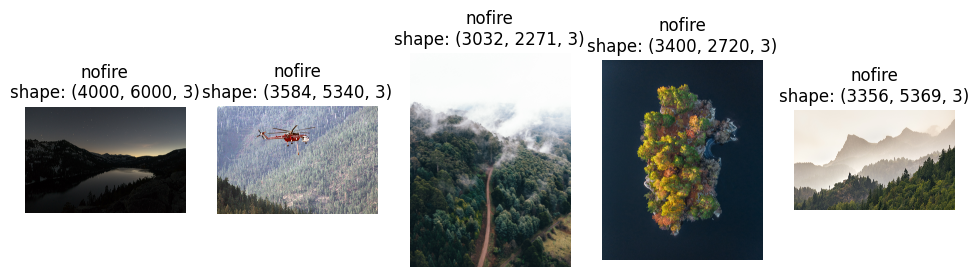

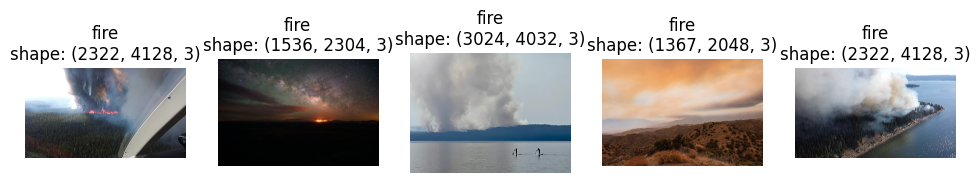

Found 1887 images belonging to 2 classes.
Found 402 images belonging to 2 classes.


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elmadafri/the-wildfire-dataset")
print("Path to dataset files:", path)

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# GPU check
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('✅ GPU is Available!')
else:
    print('⚠️ GPU is Unavailable!')

# Paths
train_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/train'
val_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/val'
test_dir = '/root/.cache/kagglehub/datasets/elmadafri/the-wildfire-dataset/versions/3/the_wildfire_dataset_2n_version/test'

# Get class info
classes = os.listdir(train_dir)
num_classes = len(classes)
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')

# Sample images from first class
plt.figure(figsize=(12, 10))
for i in range(5):
    class_path = os.path.join(train_dir, classes[0])
    img_name = np.random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f'{classes[0]}\nshape: {img.shape}')
    plt.axis('off')
plt.show()

# Sample images from second class
plt.figure(figsize=(12, 10))
for i in range(5):
    class_path = os.path.join(train_dir, classes[1])
    img_name = np.random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, img_name)
    img = plt.imread(img_path)

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(f'{classes[1]}\nshape: {img.shape}')
    plt.axis('off')
plt.show()

# ✅ Image augmentation added here
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    class_mode='categorical'
)
